### NRT Lectures - Statistical Modeling

# Bayesian Hierarchical Model

### Rat Tumor Example

In [1]:
import math
import random
import numpy as np
import pandas as pd
# import graphviz
# from pymc3 import model_to_graphviz
import pymc3 as pm
from pymc3 import Model, sample, Beta, Binomial, Exponential, Uniform, summary, plot_posterior, model_to_graphviz, Deterministic
import matplotlib.pyplot as plt
# import os
# os.environ["PATH"] += os.pathsep + 'C:\Program Files\Python37\Lib\site-packages\graphviz\dot.py'

In [2]:
d =  pd.read_table("rattumor.txt", sep = " ")
d = d.iloc[:,:2]
d

y   N
0    0  20
1    0  20
2    0  20
3    0  20
4    0  20
..  ..  ..
66  16  52
67  15  46
68  15  47
69   9  24
70   4  14

[71 rows x 2 columns]

In [3]:
d.describe()

y          N
count  71.000000  71.000000
mean    3.760563  24.492958
std     3.811504  10.973830
min     0.000000  10.000000
25%     1.000000  19.000000
50%     3.000000  20.000000
75%     5.000000  22.500000
max    16.000000  52.000000

A naive estimate of $\theta_j$ is $\hat{\theta_j}=y_j/n_j$.

Histogram of  $\hat{\theta_j}$:

<function matplotlib.pyplot.show(*args, **kw)>

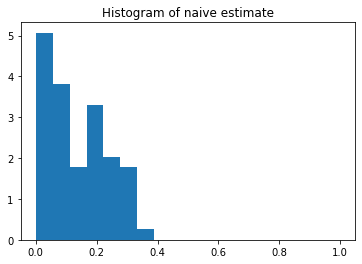

In [4]:
plt.hist(d.y/d.N, range = (0,1), bins = 18, density=True)
plt.title("Histogram of naive estimate")
plt.show

In [5]:
with Model() as model1:

    # Priors
    alpha = Exponential('alpha', 0.001)
    beta = Exponential('beta', 0.001)

    theta = Beta('theta', alpha=alpha, beta=beta, shape=71)

    # Data likelihood
    y_like = Binomial('y_like', n=d.N, p=theta, observed=d.y)

In [6]:
random.seed(100)
with model1:
    trace1 = sample(100, tune=100)

Only 100 samples in chain.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [theta, beta, alpha]
Sampling 2 chains, 0 divergences: 100%|██████████| 400/400 [00:02<00:00, 163.90draws/s]
The acceptance probability does not match the target. It is 0.9347562092830946, but should be close to 0.8. Try to increase the number of tuning steps.
The acceptance probability does not match the target. It is 0.966063674632247, but should be close to 0.8. Try to increase the number of tuning steps.
The rhat statistic is larger than 1.4 for some parameters. The sampler did not converge.
The number of effective samples is smaller than 10% for some parameters.


In [7]:
summary(trace1)

mean       sd  hpd_3%  hpd_97%  mcse_mean  mcse_sd  ess_mean  \
alpha       45.039   47.525   1.461  121.111     29.701   24.006       3.0   
beta       256.301  267.787   8.570  710.858    168.620  136.621       3.0   
theta[0]     0.109    0.047   0.015    0.173      0.025    0.020       3.0   
theta[1]     0.106    0.048   0.022    0.170      0.025    0.019       4.0   
theta[2]     0.108    0.045   0.022    0.171      0.025    0.019       3.0   
...            ...      ...     ...      ...        ...      ...       ...   
theta[66]    0.211    0.060   0.138    0.337      0.034    0.027       3.0   
theta[67]    0.216    0.067   0.124    0.332      0.038    0.030       3.0   
theta[68]    0.214    0.065   0.138    0.345      0.035    0.028       3.0   
theta[69]    0.213    0.072   0.125    0.348      0.039    0.030       3.0   
theta[70]    0.175    0.052   0.111    0.305      0.017    0.012       9.0   

           ess_sd  ess_bulk  ess_tail  r_hat  
alpha         3.0       3.0      61.0   1.92  
beta          3.0       3.0      66.0   1.92  
theta[0]      3.0       4.0      58.0   1.57  
theta[1]      4.0       5.0     113.0   1.37  
theta[2]      3.0       4.0      60.0   1.54  
...           ...       ...       ...    ...  
theta[66]     3.0       3.0      79.0   1.66  
theta[67]     3.0       3.0      87.0   1.70  
theta[68]     3.0       4.0     150.0   1.61  
theta[69]     3.0       3.0      95.0   1.71  
theta[70]     9.0      15.0     106.0   1.26  

[73 rows x 11 columns]

array([<matplotlib.axes._subplots.AxesSubplot object at 0x11a112a20>],
      dtype=object)

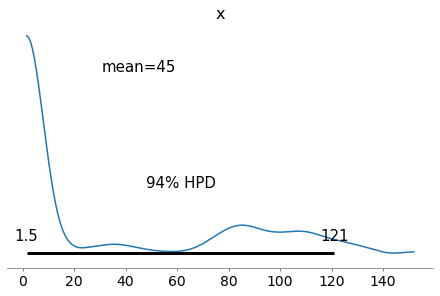

In [8]:
plot_posterior(trace1['alpha'])

array([<matplotlib.axes._subplots.AxesSubplot object at 0x11a221eb8>],
      dtype=object)

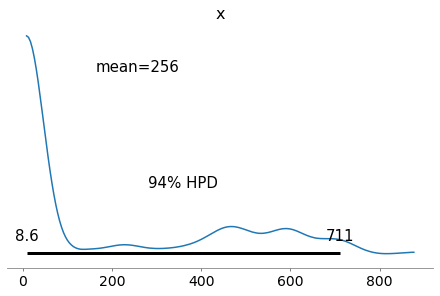

In [9]:
plot_posterior(trace1['beta'])

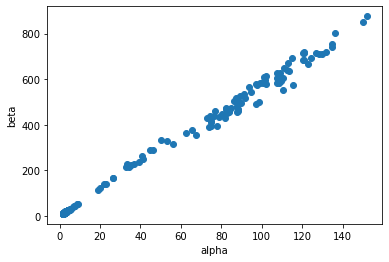

In [10]:
alpha = trace1.get_values(varname='alpha')
beta = trace1.get_values(varname='beta')
plt.scatter(alpha, beta)
plt.xlabel('alpha')
plt.ylabel('beta')
plt.show()

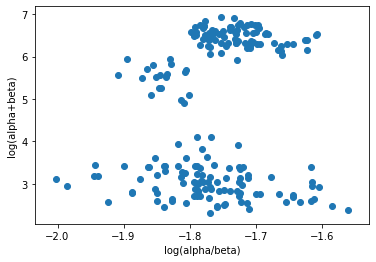

In [11]:
plt.scatter(np.log(alpha/beta), np.log(alpha+beta))
plt.xlabel('log(alpha/beta)')
plt.ylabel('log(alpha+beta)')
plt.show()

### Try another prior

In [12]:
with Model() as model2:

    phi1 = Uniform('phi1', lower=0, upper=1)
    phi2 = Uniform('phi2', lower=0, upper=1000)

    alpha = Deterministic('alpha', phi1 / (phi2**2))
    beta = Deterministic('beta', (1-phi1) / phi2**2)

    theta = Beta('theta', alpha=alpha, beta=beta, shape=71)

    # Data likelihood
    y_like = Binomial('y_like', n=d.N, p=theta, observed=d.y)

In [13]:
random.seed(100)
with model2:
    trace2 = sample(100, tune=100)

Only 100 samples in chain.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [theta, phi2, phi1]
Sampling 2 chains, 0 divergences: 100%|██████████| 400/400 [00:05<00:00, 72.73draws/s]
The acceptance probability does not match the target. It is 0.9425353776422641, but should be close to 0.8. Try to increase the number of tuning steps.
The acceptance probability does not match the target. It is 0.9515178810489138, but should be close to 0.8. Try to increase the number of tuning steps.
The rhat statistic is larger than 1.05 for some parameters. This indicates slight problems during sampling.


In [14]:
summary(trace2)

mean     sd  hpd_3%  hpd_97%  mcse_mean  mcse_sd  ess_mean  \
phi1        0.144  0.014   0.121    0.172      0.001    0.001     209.0   
phi2        0.260  0.042   0.179    0.329      0.006    0.004      53.0   
alpha       2.301  0.791   1.120    3.768      0.112    0.080      50.0   
beta       13.699  4.728   6.619   23.070      0.628    0.446      57.0   
theta[0]    0.058  0.044   0.004    0.143      0.003    0.002     193.0   
...           ...    ...     ...      ...        ...      ...       ...   
theta[66]   0.272  0.055   0.177    0.378      0.004    0.003     170.0   
theta[67]   0.274  0.052   0.182    0.364      0.002    0.002     460.0   
theta[68]   0.283  0.059   0.170    0.387      0.003    0.002     460.0   
theta[69]   0.285  0.066   0.163    0.408      0.004    0.003     258.0   
theta[70]   0.211  0.075   0.063    0.356      0.004    0.003     354.0   

           ess_sd  ess_bulk  ess_tail  r_hat  
phi1        209.0     208.0     180.0   1.01  
phi2         53.0      53.0     150.0   1.05  
alpha        50.0      46.0     134.0   1.07  
beta         57.0      55.0     150.0   1.05  
theta[0]    193.0     147.0     127.0   1.00  
...           ...       ...       ...    ...  
theta[66]   123.0     187.0      55.0   1.04  
theta[67]   460.0     460.0     186.0   1.00  
theta[68]   449.0     460.0     173.0   1.00  
theta[69]   227.0     258.0      98.0   1.03  
theta[70]   336.0     384.0     160.0   1.00  

[75 rows x 11 columns]

array([<matplotlib.axes._subplots.AxesSubplot object at 0x1277a2f28>],
      dtype=object)

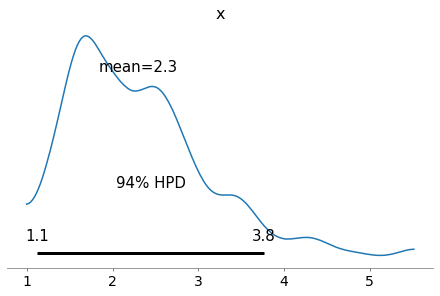

In [15]:
plot_posterior(trace2['alpha'])

array([<matplotlib.axes._subplots.AxesSubplot object at 0x1277c6f60>],
      dtype=object)

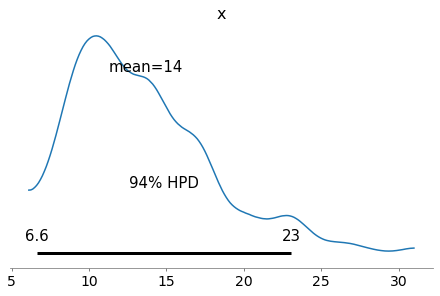

In [16]:
plot_posterior(trace2['beta'])

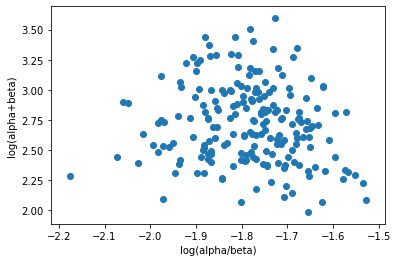

In [17]:
alpha2 = trace2.get_values(varname='alpha')
beta2 = trace2.get_values(varname='beta')
plt.scatter(np.log(alpha2/beta2), np.log(alpha2+beta2))
plt.xlabel('log(alpha/beta)')
plt.ylabel('log(alpha+beta)')
plt.show()